# Execute the code below

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [0]:
# Your code here :
fig = px.scatter_3d(df_weather, x = 'MAX_TEMPERATURE_C', y = 'MIN_TEMPERATURE_C', z = 'SUNHOUR')
fig.show()

Is it hard to read the 3D scatterplot ?

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y). 

**Remember to save the result of your prediction in a cew column 'predict'.**

In [0]:
# Your code here :
from sklearn.linear_model import LinearRegression
X = df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C'] 

modelLR = LinearRegression().fit(X, y)

df_weather['PREDICTION'] = modelLR.predict(df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']])

### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours

Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !

In [0]:
# Your code here :
fig = px.scatter_3d(df_weather, x = 'PREDICTION', y = 'MIN_TEMPERATURE_C', z = 'SUNHOUR')
fig.show()

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware : variables must be numeric. Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots

In [0]:
# Your code here :
X = df_weather[['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
                'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
                'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
                'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
                'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
                'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
                'UV_INDEX', 'SUNHOUR', 'MONTH', 'DAY']]
y = df_weather['MAX_TEMPERATURE_C'] 

modelLR2 = LinearRegression().fit(X, y)

df_weather['PREDICTION2'] = modelLR2.predict(X)

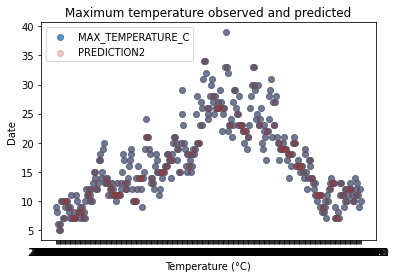

In [0]:
plt.scatter('DATE', 'MAX_TEMPERATURE_C', data = df_weather, c = '#2471A3', alpha = .75)
plt.scatter('DATE', 'PREDICTION2', data = df_weather, c = '#A93226', alpha = .25)
plt.legend()
plt.title('Maximum temperature observed and predicted')
plt.xlabel('Temperature (°C)')
plt.ylabel('Date')
plt.show()